In [13]:
from scipy.optimize import root_scalar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
cm = 1/2.54  
width = 12*cm 

In [14]:
# def kappa_np(A,Gam,sgam,mp):
#     res =Gam/2/A*(-1/np.sqrt(2)+mp*np.sqrt(1/2+4*A+4*A*sgam/Gam))
#     if res>=0:
#         return res
#     else:
#         return Gam/2/A*(-1/np.sqrt(2)+np.sqrt(1/2+4*A+4*A*sgam/Gam))
# def func_B(w,A,Gam,sgam,mp):
#     return 1/w**2*Gam/np.sqrt(2)*kappa_np(A,Gam,sgam,mp)
# def ymax(w,a,G,gamma):
#     k = kappa_np(a,G,gamma,-1)
#     return (2+np.sqrt(1-3*k**2/w**2*a))/3


# def testFunc(w,a,G,gamma):
#     return 2*ymax(w,a,G,gamma)**3-2*ymax(w,a,G,gamma)**2
# def w_boundary(w,a,Gam,sgam):
#     return -func_B(w,a,Gam,sgam,-1)-testFunc(w,a,Gam,sgam)
def Ak(k,Gam,sgam):
    return Gam*(Gam+sgam-k)/k**2/2

def AOK(k,Gam,sgam):
    return Gam*(Gam+sgam-k)
def ymaxx(w,k,G,gamma):
    return (2+np.sqrt(1-3/2/w**2*AOK(k,G,gamma)))/3
# def bk(k,Gam,sgam):
#     return 2*AOK(k,Gam,sgam)/(-1-np.sqrt(1+8*Ak(k,Gam,sgam)*(1+sgam/Gam)))
def B_org(w,k,Gam):
    return k*Gam/2/w**2

def maxFk(k,w,Gam,sgam):
    return -B_org(k,Gam,sgam)+2*ymaxx(w,k,Gam,sgam)**3-2*ymaxx(w,k,Gam,sgam)**2


# def rootFw(w,k,Gam,sgam):
#     return bk(k,Gam,sgam)/w**2-2*ymaxx(w,k,Gam,sgam)**3+2*ymaxx(w,k,Gam,sgam)**2
def minF(w,k,G,gamma):
    return (2-np.sqrt(1-3/2/w**2*AOK(k,G,gamma)))/3
def maxF(w,k,G,gamma):
    return (2+np.sqrt(1-3/2/w**2*AOK(k,G,gamma)))/3
def Func(y,w,k,Gam,sgam,mp):
    return -B_org(k,Gam,sgam)-(1/2/w**2*AOK(k,Gam,sgam)+1)*y-y**3+2*y**2

def lam1(y,w,k,Gam,sgam):
    A = AOK(k,Gam,sgam)
    p = Gam**2/w**2+A/w**2/2+3*y**2-4*y+1
    q = Gam**2/w**2*(A/w**2/2+3*y**2-4*y+1)+Gam**2/k**2*(2*y-k/w)*(y-k/w)
    return (-p+np.sqrt(p**2-4*q))/2, p,p**2-4*q

def lam2(y,w,k,Gam,sgam):
    A = AOK(k,Gam,sgam)
    p = Gam**2/w**2+A/w**2/2+3*y**2-4*y+1
    q = Gam**2/w**2*(A/w**2/2+3*y**2-4*y+1)+Gam**2/k**2*(2*y-k/w)*(y-k/w)
    return (-p-np.sqrt(p**2-4*q))/2, p,p**2-4*q
def damping(w,k,Gamma,gamma):
    s2= np.sqrt(2)
    return -2/27-(2*gamma+k)/6*Gamma/w**2+2/27*(1-3*(2*Gamma**2+AOK(k,Gamma,gamma))/2/w**2)**(3/2)

In [18]:

K = np.linspace(7.5,10,30)
mp=-1
W = np.linspace(1,(K[0]-2.3)/3.53,30)


class TickProperties():
    
    major_xtick_step = 5,
    minor_xtick_step = 1
    major_ytick_step = 5
    minor_ytick_step = 1
    STRIP_OF_ZEROS_X = False
    STRIP_OF_ZEROS_Y = False

    def __init__(self,name_of_plot = "sign_of_ev1.pdf",\
    xtick_step_major = 5,\
    xtick_step_minor = 1,\
    ytick_step_major = 5,\
    ytick_step_minor = 1,\
    SZX = False,\
    SZY = False):
        self.major_xtick_step = xtick_step_major
        self.minor_xtick_step = xtick_step_minor
        self.major_ytick_step = ytick_step_major
        self.minor_ytick_step = ytick_step_minor
        self.STRIP_OF_ZEROS_X = SZX
        self.STRIP_OF_ZEROS_Y = SZY

class Format():
    numb_xticks = None
    numb_yticks = None
    custom_func = None
    x_scale = None
    y_scale = None
    def __init__(self,numb_xticks=None,numb_yticks=None,custom_func=None,xscale=None,yscale=None):
        self.numb_xticks =numb_xticks
        self.numb_yticks = numb_yticks
        self.custom_func = custom_func
        self.x_scale = xscale
        self.y_scale = yscale
    def formatx0(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))
            
            index = int((pos-1)*self.x_scale.shape[0]//self.numb_xticks)
            # print(index)
            # print()
            return "{:.2f}".format(self.x_scale[index])
        except:
            return "{:.2f}".format(self.x_scale[-1])
    def formatx1(self,x,pos):
        try:
                # print(x,pos)#,"{:.2f}".format(w[int(x)]))

            index = int((pos-1)*self.x_scale.shape[0]//self.numb_xticks)
            # print(index)
            # print()
            return "{:.3f}".format(self.x_scale[index])
        except:
            return "{:.1f}".format(self.x_scale[-1])
        
    def formaty(self,x,pos):
        try:
            return "{:.2f}".format(self.y_scale[int(x)])
        except:
            return ""

class Setup_Fig():
    DEFAULT_HEAT_EXTEND = (-0.5,39.5,29.5,-0.5)
    xlim = None
    ylim = None
    tickprop = TickProperties()
    formatter = None
    def __init__(self,xlim=None,ylim=None,tickp=TickProperties(),formater=None):
        self.xlim=xlim
        self.ylim = ylim   
        self.tickprop =tickp       
        self.formatter = formater

    
    plt.rcParams["lines.markersize"]=0.7
    plt.rcParams["axes.unicode_minus"]=True
    plt.rcParams["font.size"]=10
    plt.rcParams["text.usetex"]=True
    plt.rcParams["font.serif"]="Computer Modern Serif"
# ax.scatter(A,root,color='0')
    trash, xw, yw, trash=DEFAULT_HEAT_EXTEND# im.get_extent()
    numb_xticks = xw//tickprop.major_xtick_step+1
    numb_yticks = yw//tickprop.major_ytick_step+1



    def return_fig(self):
        fig, ax = plt.subplots(1,1,figsize=(width,4.8/6.4*width),dpi=400)


        # axlimits have to be adapted
        try:
            ax.set_xlim(**self.xlim)
        except:
            pass
        try:
            ax.set_ylim(**self.ylim)
        except:
            pass    
    

        if self.tickprop.STRIP_OF_ZEROS_X:
            ax.xaxis.set_major_formatter(ticker.FuncFormatter(self.formatter.formatx0))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(self.tickprop.major_ytick_step))
        ax.yaxis.set_minor_locator(ticker.MultipleLocator(self.tickprop.minor_ytick_step))
        ax.xaxis.set_major_locator(ticker.MultipleLocator(self.tickprop.major_xtick_step))
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(self.tickprop.minor_xtick_step))

        if self.tickprop.STRIP_OF_ZEROS_Y:
            ax.yaxis.set_major_formatter(ticker.FuncFormatter(self.formatter.formaty))  

    
        ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
        ax.tick_params(axis='both',which='major',length=4.5)
        ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
        # ax.set_xlabel(r'$\Gamma \tilde{A}$')
        # ax.set_ylabel(r'$\tilde{y}$',rotation=0)
        plt.setp(ax.yaxis.get_majorticklabels(),va='center')
        
        return fig, ax





-0.47815929179712907 4.526455588093425
-0.43772448515415513 4.352270160072018
-0.4006602792827963 4.187744078574389
-0.3666671794083609 4.0321896908083605
-0.33547536369498043 3.88497850893744
-0.3068414030097154 3.745535281200348
-0.2805453820875745 3.613332737850931
-0.2563883682232192 3.4878869262563033
-0.23419018147747084 3.3687530614515033
-0.21378742701099035 3.2555218285924403
-0.19503175575263887 3.1478160823733083
-0.17778832434741973 3.0452878958252634
-0.1619344293495108 2.9476159171929
-0.1473582940459943 2.8545029989624235
-0.13395798921265006 2.7656740677301315
-0.12164047159434949 2.6808742075689116
-0.11032072603546329 2.5998669329711848
-0.09992099901557669 2.522432630401152
-0.09037011291880807 2.448367150045793
-0.08160285171988807 2.377480531570812
-0.07355940993928001 2.309595849613395
-0.06618489773035792 2.244548166419561
-0.05942889583700837 2.182183580495056
-0.053245054919448545 2.1223583614149035
-0.04759073440603339 2.064938162053216
-0.04242667660332139 2.

/tmp/ipykernel_343744/2142360351.py:171: RuntimeWarning: invalid value encountered in sqrt
  return (-p+np.sqrt(p**2-4*q))/2, p,p**2-4*q


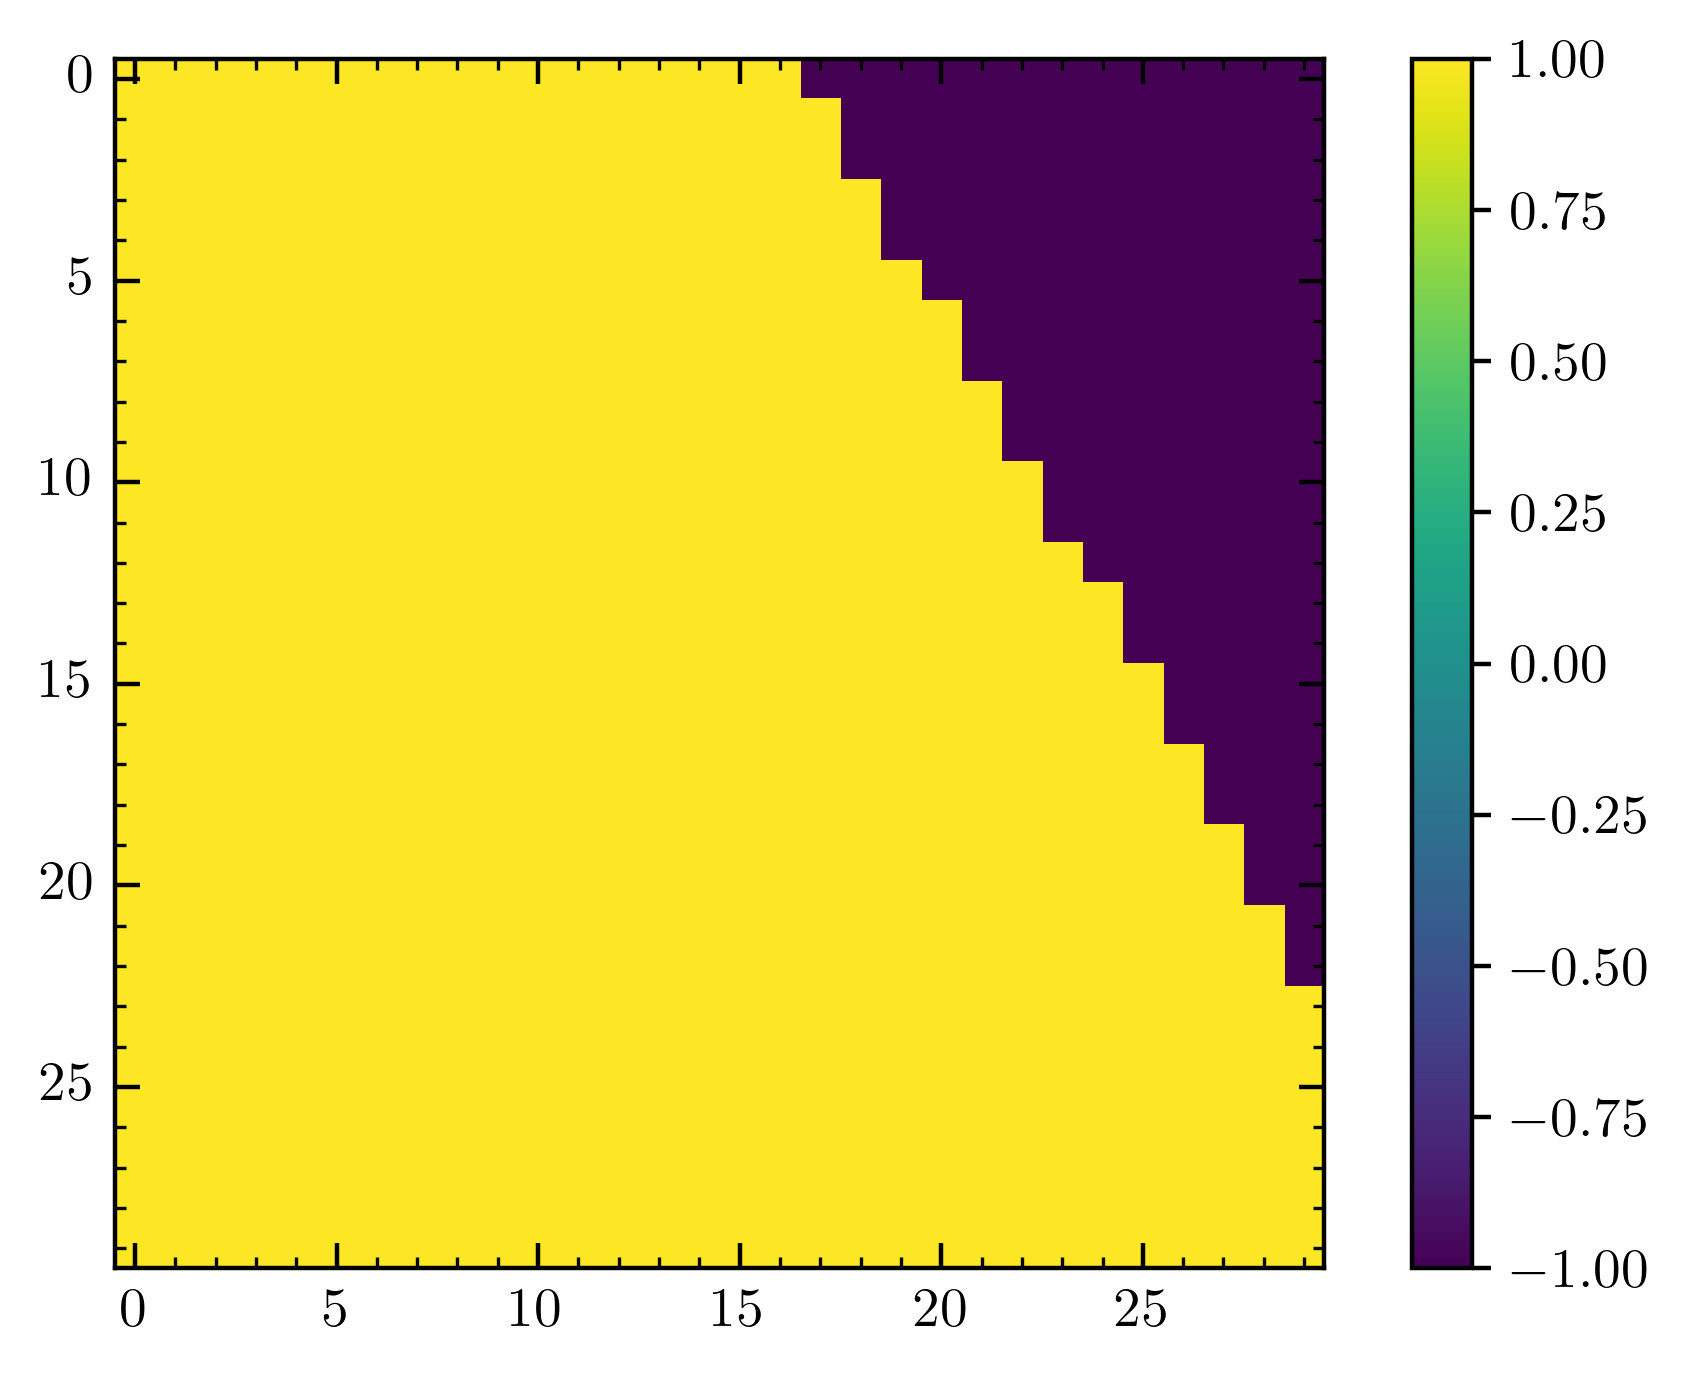

In [19]:
Gam = 1
sgam = 0.2*Gam



A = np.linspace(-1/(8*(1+sgam/Gam))+1/10**6,0-1/10**6,30)


w_b= np.zeros_like(A)
# w0 = root_scalar(maxFk,args=(4/np.sqrt(2),Gam,sgam),method='brentq',bracket=(0.1,1.4))

# K = np.linspace(w0.root*3.53+2.17+2,10,30)
K = np.linspace(7.5,10,30)
mp=-1
W = np.linspace(1,(K[0]-2.3)/3.53,30)
# W = np.ones_like(W)*W[0]




root = np.zeros((W.shape[0],W.shape[0]))
conv= np.zeros((W.shape[0],K.shape[0]))
check = np.zeros((W.shape[0],K.shape[0]))
lamda= np.zeros((W.shape[0],K.shape[0]))#,K.shape[1]))
damp = np.zeros((W.shape[0],K.shape[0]))#,K.shape[1]))

mp =-1
l=0
for l in range(1):#,W.shape[1]):
    for i in range(np.shape(W)[0]):
        for j in range(np.shape(K)[0]):
            k = K[i]
            w= W[j]
            print(Func(minF(w,k,Gam,sgam),w,k,Gam,sgam,mp),Func(ymaxx(w,k,Gam,sgam),w,k,Gam,sgam,mp))

            # print(Func(-20,a,kw_val,Gam,sgam,mp),Func(minF(a,kw_val),a,kw_val,Gam,sgam,mp))
            try:
                r=root_scalar(Func,args=(w,k,Gam,sgam,mp),method='bisect',bracket=(minF(w,k,Gam,sgam),maxF(w,k,Gam,sgam)))#,maxF(a,kw_val)))
                conv[i,j]= r.converged
                root[i,j]= r.root
                trash,damp[i,j], lamda[i,j]= lam1(r.root,w,k,Gam,sgam)
                # damp[i,j] = damping(w,k,Gam,sgam)
                
                # print(r.root)
            except:
                print(l,i,j)
                
            # bracket=[minF(a)-1/10**3,maxF(a)+1/10**3],
            # check[i,j] = func_B(kw_val,a,Gam,sgam,mp)
            
# print(check)
# print(root[0,:])

# ax.plot(A,kappa_np(A,Gam,sgam,mp))
print(damp-check)
setup = Setup_Fig()
fig, ax = setup.return_fig()
im = ax.imshow(np.sign(lamda))
# ax.set_xticks(np.arange(len(w)),w)
# ax.set_yticks(np.arange(len(A)),A)
cbar = ax.figure.colorbar(im,ax=ax)
fig.tight_layout()
plt.show()


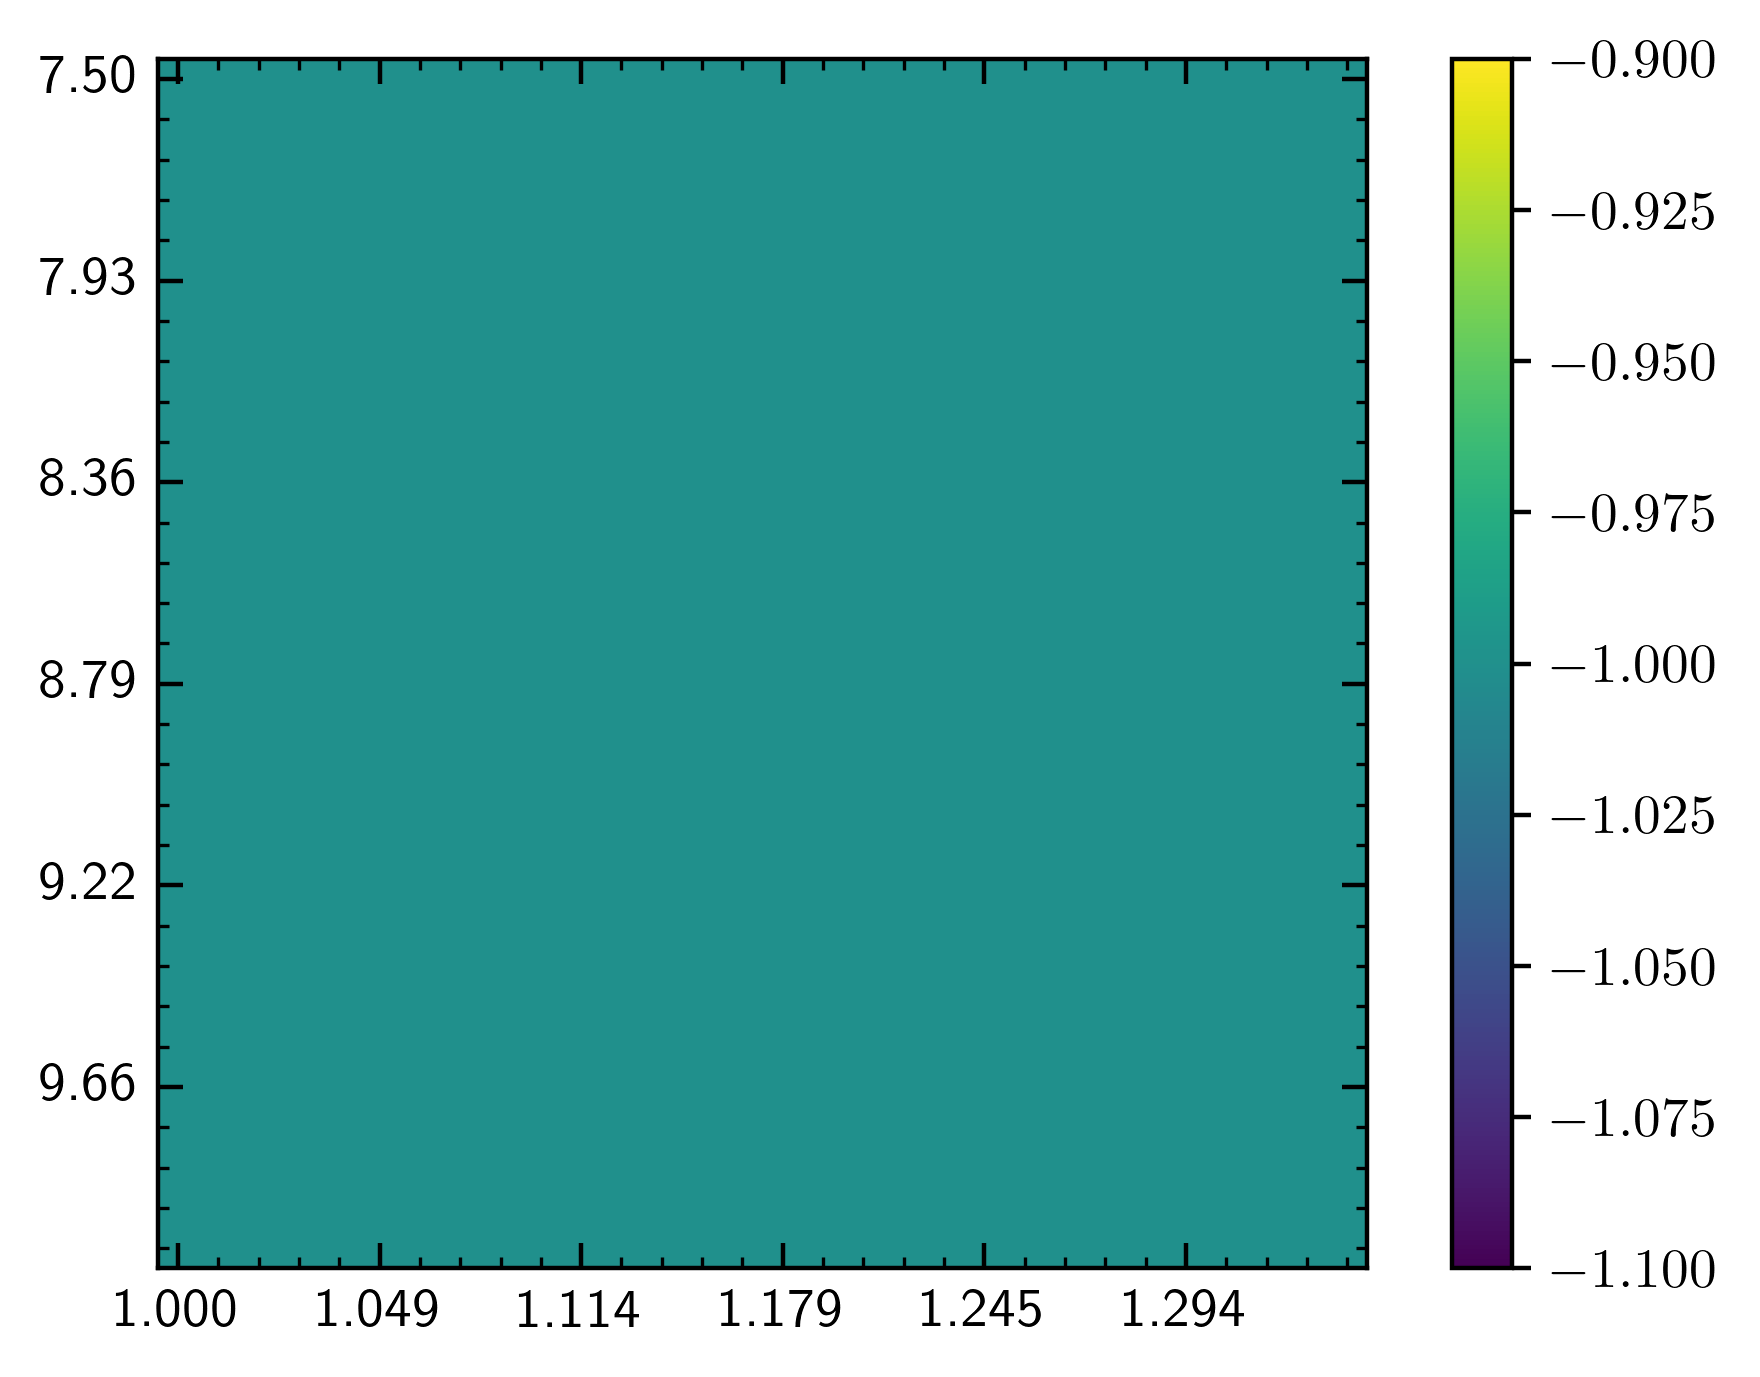

In [8]:
cm = 1/2.54  
width = 12*cm 
name_of_plot = "sign_of_ev1.pdf"
major_xtick_step = 5
minor_xtick_step = 1
major_ytick_step = 5
minor_ytick_step = 1
STRIP_OF_ZEROS_X = True
STRIP_OF_ZEROS_Y = True
                                                                              
fig, ax = plt.subplots(1,1,figsize=(width,4.8/6.4*width),dpi=400)

# ax.scatter(A,root,color='0')




# axlimits have to be adapted
# ax.set_xlim(A[0],A[-1])
# ax.set_ylim(-2.5,3.5)

# legend has to be adapted
# plt.legend([r'$r_{\lambda_1}^{max}$',r'$\tilde{y}_{max}$',r'$r_{\lambda_1}^{min}$'],loc='center left',bbox_to_anchor=(0.01,0.38))
# plt.legend([r'$r$',r'$r$',r'$y_{max}$'],loc='center left',bbox_to_anchor=(0.2,0.5))

plt.rcParams["lines.markersize"]=0.7
plt.rcParams["axes.unicode_minus"]=True
plt.rcParams["font.size"]=10
plt.rcParams["text.usetex"]=True
plt.rcParams["font.serif"]="Computer Modern Serif"
# def strip0(x,pos):
#     if x<0: 
#         return u'\u2212'+ str(x).rstrip(".0").lstrip("-")
#     else:
#         if str(x).rstrip(".0"):
#             return str(x).rstrip(".0")
#     return "0"
# im.set_extent((-0.5,39.5,29.5,-0.5))
trash, xw, yw, trash=(-0.5,39.5,29.5,-0.5)# im.get_extent()
numb_xticks = xw//major_xtick_step+1
numb_yticks = yw//major_ytick_step+1
def formatx0(x,pos):
    try:
            # print(x,pos)#,"{:.2f}".format(w[int(x)]))
           
        index = int((pos-1)*w.shape[0]//numb_xticks)
           # print(index)
           # print()
        return "{:.2f}".format(W[index])
    except:
        return "{:.2f}".format(W[-1])
def formatx1(x,pos):
    try:
            # print(x,pos)#,"{:.2f}".format(w[int(x)]))

        index = int((pos-1)*W.shape[0]//numb_xticks)
           # print(index)
           # print()
        return "{:.3f}".format(W[index])
    except:
        return "{:.1f}".format(W[-1])
    
def formaty(x,pos):
    try:
        return "{:.2f}".format(K[int(x)])
    except:
        return ""

if STRIP_OF_ZEROS_X:
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatx1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(major_ytick_step))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(minor_ytick_step))
ax.xaxis.set_major_locator(ticker.MultipleLocator(major_xtick_step))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(minor_xtick_step))

if STRIP_OF_ZEROS_Y:
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(formaty))  

  
ax.tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
ax.tick_params(axis='both',which='major',length=4.5)
ax.tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
# ax.set_xlabel(r'$\Gamma \tilde{A}$')
# ax.set_ylabel(r'$\tilde{y}$',rotation=0)
plt.setp(ax.yaxis.get_majorticklabels(),va='center')

im = ax.imshow(np.sign(damp))
cbar = ax.figure.colorbar(im,ax=ax)
fig.tight_layout()
plt.show()

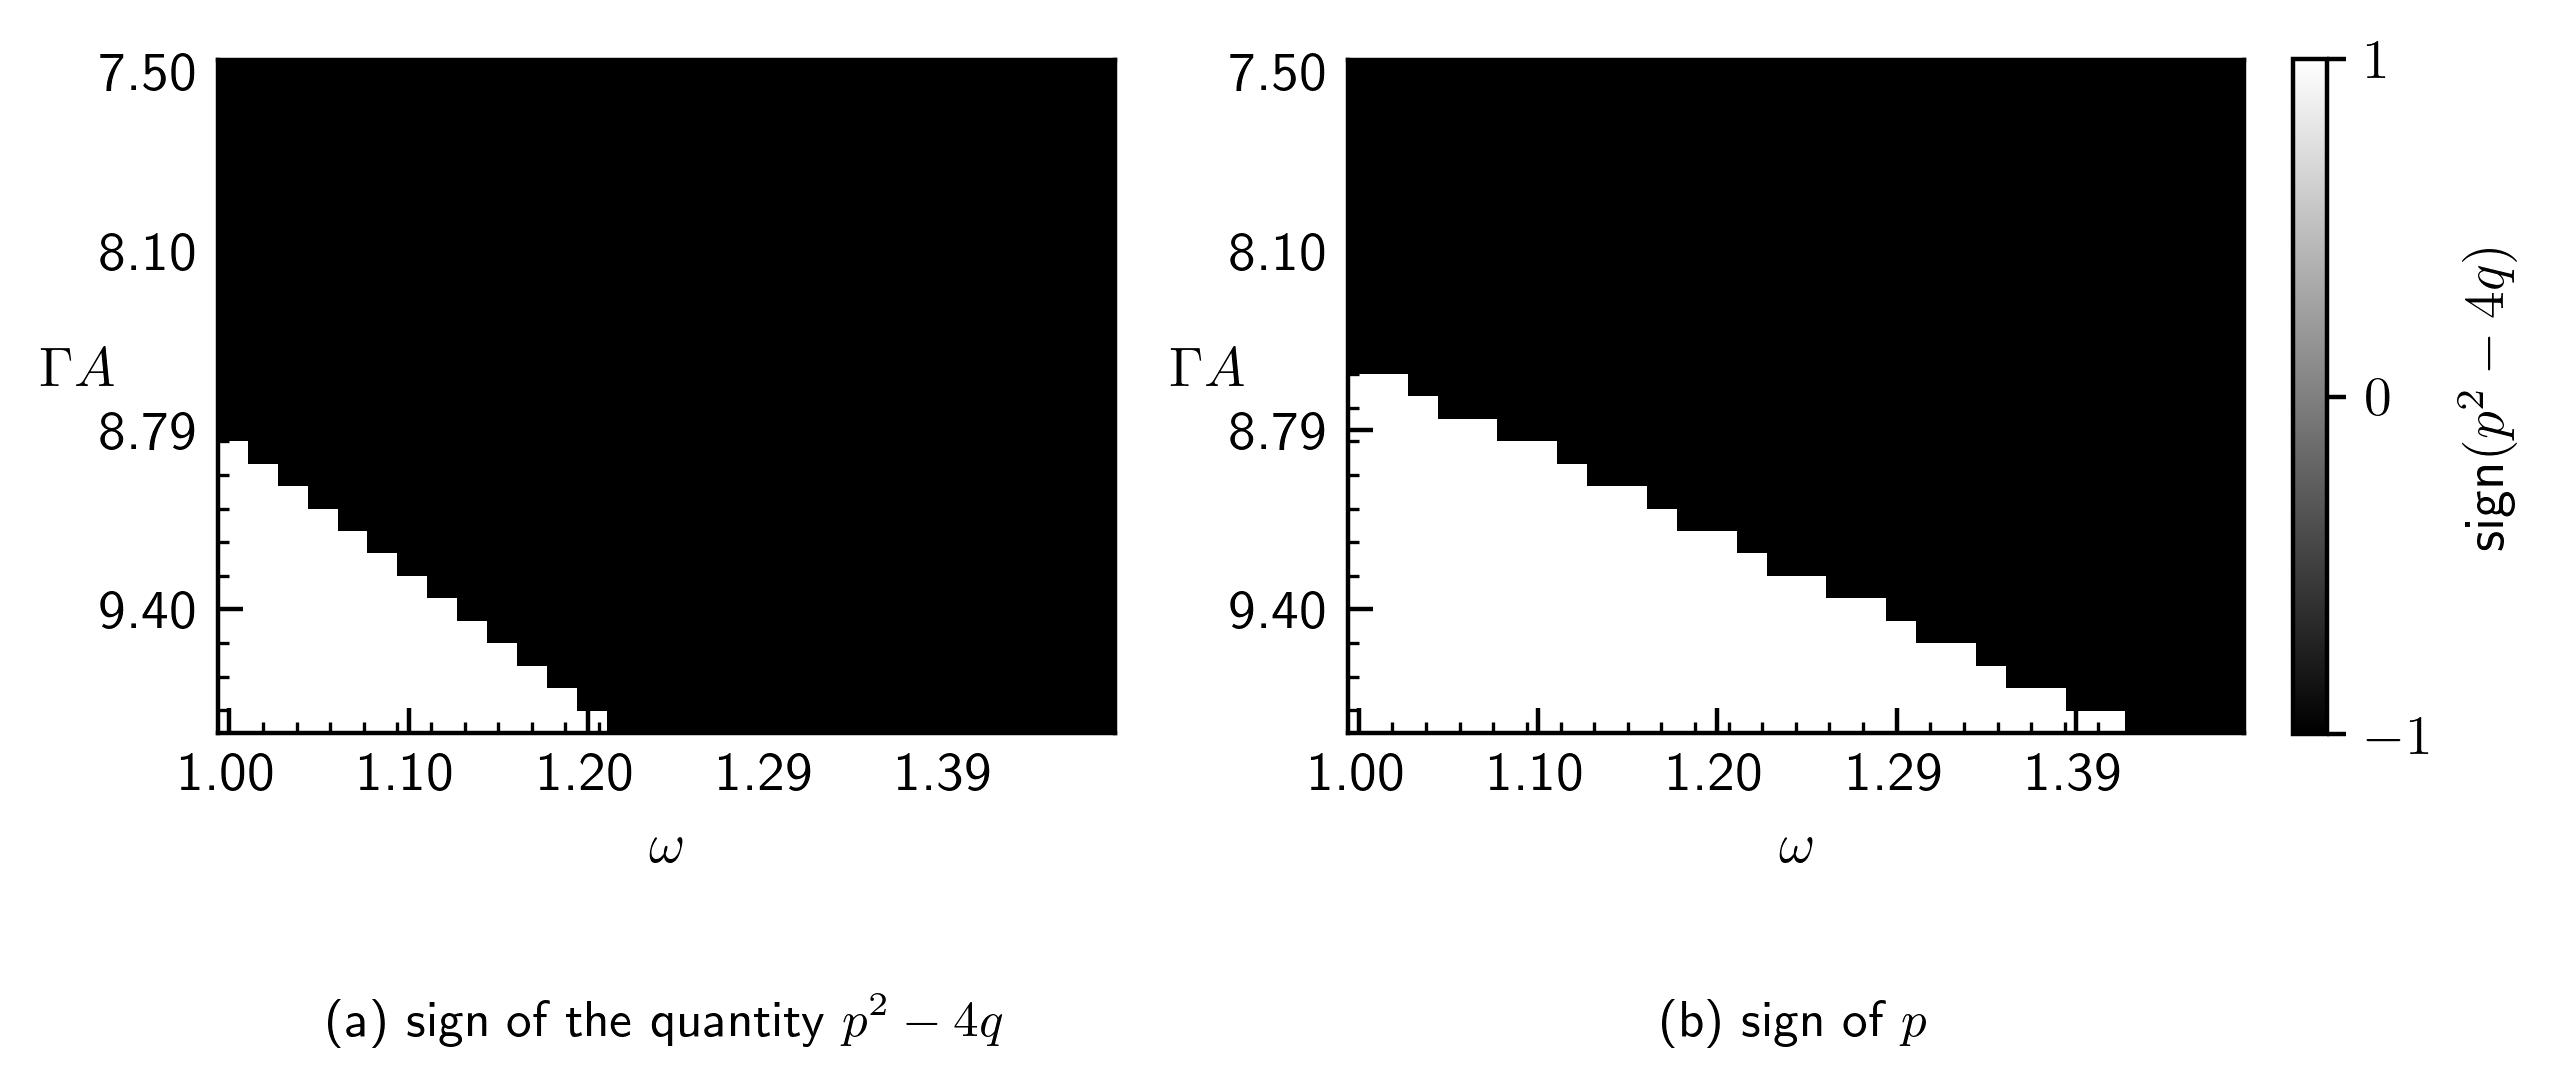

In [6]:
cm = 1/2.54  
width = 10*cm 
name_of_plot = "oszi_of_ev2_fix1.pdf"
title = [r'(a) sign of the quantity $p^2-4q$',r'(b) sign of $p$']
plt.rcParams["lines.markersize"]=0.7
plt.rcParams["axes.unicode_minus"]=True
plt.rcParams["font.size"]=10
plt.rcParams["text.usetex"]=True
plt.rcParams["font.serif"]="Computer Modern Serif"
# lam = lamda
lamda = np.stack((lam,damp),axis=2)
nplots =2   
fig, ax = plt.subplots(1,nplots,figsize=(2*width,4.8/6.4*width),dpi=400)
images = []
# ax[n].scatter(A,root,color='0')
for n in range(nplots):



# axlimits have to be adapted
# ax[n].set_xlim(A[0],A[-1])
# ax[n].set_ylim(-2.5,3.5)

# legend has to be adapted
# plt.legend([r'$r_{\lambda_1}^{max}$',r'$\tilde{y}_{max}$',r'$r_{\lambda_1}^{min}$'],loc='center left',bbox_to_anchor=(0.01,0.38))
# plt.legend([r'$r$',r'$r$',r'$y_{max}$'],loc='center left',bbox_to_anchor=(0.2,0.5))

    major_xtick_step = 8
    minor_xtick_step = 1.5
    major_ytick_step = 8
    minor_ytick_step = 1.5
    STRIP_OF_ZEROS_X = True
    STRIP_OF_ZEROS_Y = True


    # def strip0(x,pos):
    #     if x<0: 
    #         return u'\u2212'+ str(x).rstrip(".0").lstrip("-")
    #     else:
    #         if str(x).rstrip(".0"):
    #             return str(x).rstrip(".0")
    #     return "0"
    im = ax[n].imshow(np.sign(lamda[:,:,n]),cmap='gray')
    im.set_extent((-0.5,39.5,29.5,-0.5))
    trash, xw, yw, trash= im.get_extent()
    numb_xticks = xw//major_xtick_step+1
    numb_yticks = yw//major_ytick_step+1
    def formatx0(x,pos):
        try:

            # print(x,pos)#,"{:.2f}".format(w[int(x)]))
            
            index = int((pos-1)*W.shape[0]//numb_xticks)
            # print(index)
            # print()
            return "{:.2f}".format(W[index])
        except:
            return "{:.2f}".format(W[-1])
    def formatx1(x,pos):
        try:

            # print(x,pos)#,"{:.2f}".format(w[int(x)]))
            
            index = int((pos-1)*W.shape[0]//numb_xticks)
            # print(index)
            # print()
            return "{:.2f}".format(W[index])
        except:
            return "{:.2f}".format(W[-1])
    def formaty0(x,pos):
        try:
            index = int((pos-1)*K.shape[0]//numb_yticks)
            return "{:.2f}".format(K[index])
        except:
            return "{:.2f}".format(K[-1])
    def formaty1(x,pos):
        try:
            index = int((pos-1)*K.shape[0]//numb_yticks)
            return "{:.2f}".format(K[index])
        except:
            return "{:.2f}".format(K[-1])
    
    ax[n].yaxis.set_major_locator(ticker.MultipleLocator(major_ytick_step))
    ax[n].yaxis.set_minor_locator(ticker.MultipleLocator(minor_ytick_step))
    ax[n].xaxis.set_major_locator(ticker.MultipleLocator(major_xtick_step))
    ax[n].xaxis.set_minor_locator(ticker.MultipleLocator(minor_xtick_step))
    if STRIP_OF_ZEROS_X:
        if n==0:
            ax[n].xaxis.set_major_formatter(ticker.FuncFormatter(formatx0))
        else:
            ax[n].xaxis.set_major_formatter(ticker.FuncFormatter(formatx1))
    if STRIP_OF_ZEROS_Y:
        if n==0:
            ax[n].yaxis.set_major_formatter(ticker.FuncFormatter(formaty0))
        else:
            ax[n].yaxis.set_major_formatter(ticker.FuncFormatter(formaty1))
    ax[n].tick_params(axis='x',direction='in',which='both',bottom=True,top=True,labelbottom=True)
    ax[n].tick_params(axis='both',which='major',length=4.5)
    ax[n].tick_params(axis='y',direction='in',which='both',left=True,right=True,labelleft=True)
    ax[n].set_ylabel(r'$\Gamma A$',rotation=0)
    ax[n].set_xlabel(r'$$\omega$$',rotation=0)
    ax[n].set_title(title[n],loc='center',y=-0.5,fontsize=9)

plt.subplots_adjust(wspace=0.26)

# ax.set_xticks(np.arange(len(w)),w)
# ax.set_yticks(np.arange(len(A)),A)
cbar = ax[1].figure.colorbar(im,ax=ax,ticks=ticker.MultipleLocator(1),label=r'sign$(p^2-4q)$',pad=0.02,shrink=0.743)
# ax.figure.set_size_inches(width,4.8/6.4*width)
# fig.set_size_inches(width,4.8/6.4*width)


# fig.tight_layout()
# plt.savefig('/home/christian/Documents/Bachelor/protocol/pictures/'+name_of_plot,bbox_inches='tight')

plt.show()


In [10]:
indi = []
for i in range(lamda.shape[0]):
    for j in range(lamda.shape[1]):
        if lamda[i,j,0]*lamda[i,j,1]<0:
            indi.append([W[j],K[i]])
indi = np.array(indi)
i1=0
i2=-1
W0 , K0 , slope = indi[0,0], indi[0,1], (indi[i2,1]-indi[i1,1])/(indi[i2,0]-indi[i1,0])

      converged: True
           flag: converged
 function_calls: 9
     iterations: 8
           root: 0.1446161325938055
[[  82.7468014 ]
 [-164.57734194]
 [-192.02899422]]


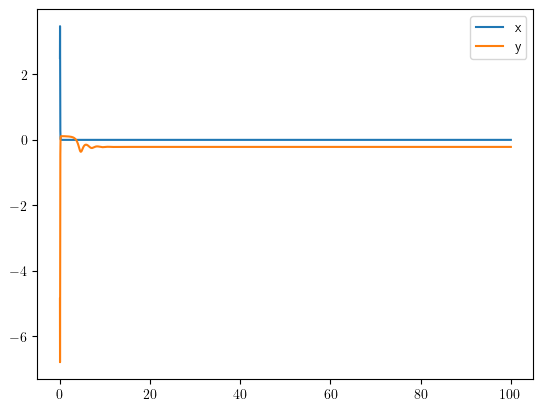

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.1487662861548717
[[  84.333715  ]
 [-167.72159785]
 [-195.466853  ]]


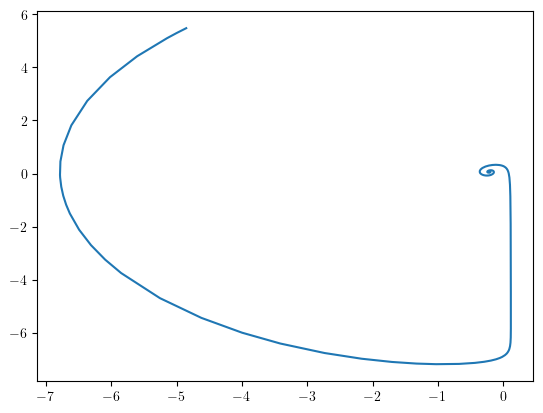

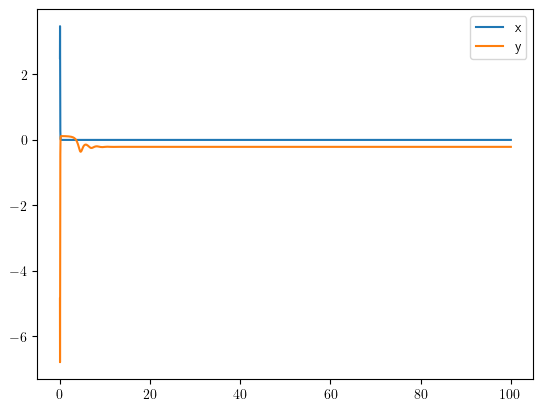

      converged: True
           flag: converged
 function_calls: 9
     iterations: 8
           root: 0.1527318819968104
[[  85.91994486]
 [-170.86549412]
 [-198.90672745]]


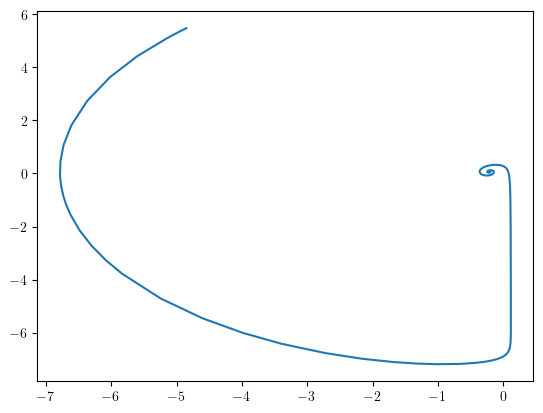

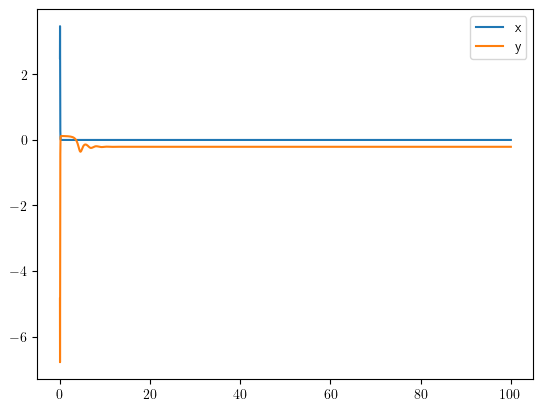

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.15652476350211172
[[  87.50552831]
 [-174.00904613]
 [-202.34849906]]


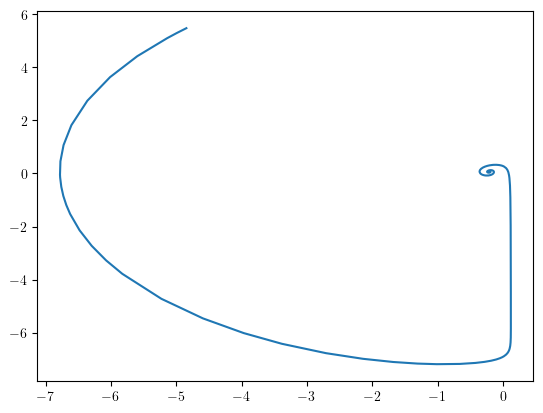

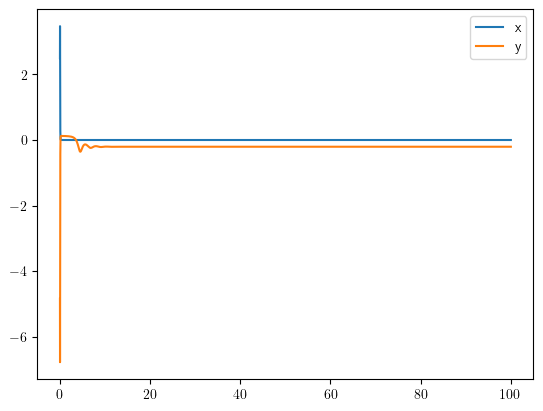

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.160155779695631
[[  89.09049959]
 [-177.15226817]
 [-205.79205937]]


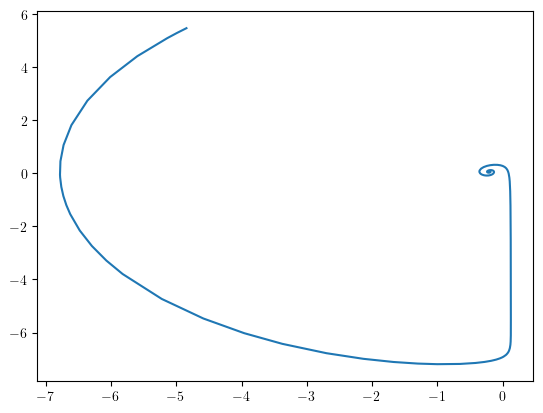

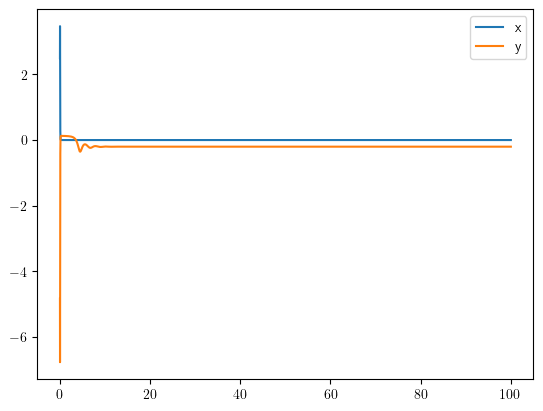

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.16363488871973078
[[  90.67489021]
 [-180.29517347]
 [-209.23730889]]


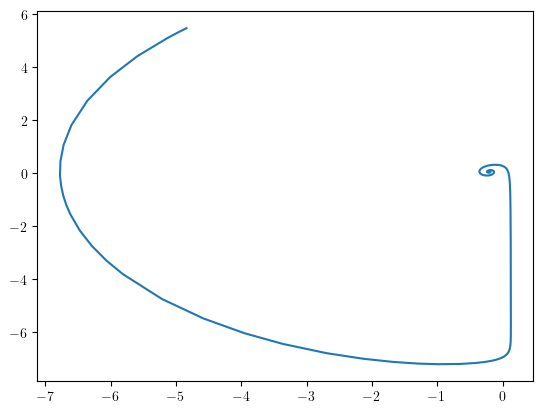

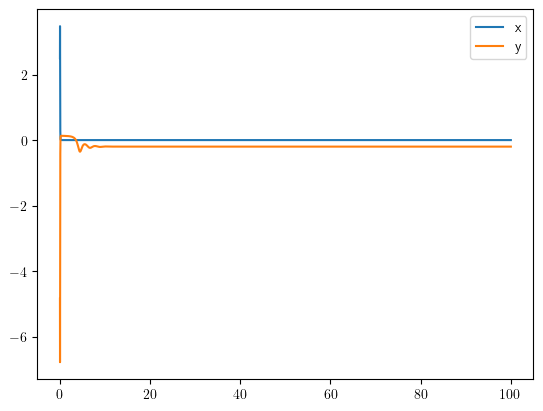

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.1669712484158406
[[  92.2587292 ]
 [-183.43777439]
 [-212.68415613]]


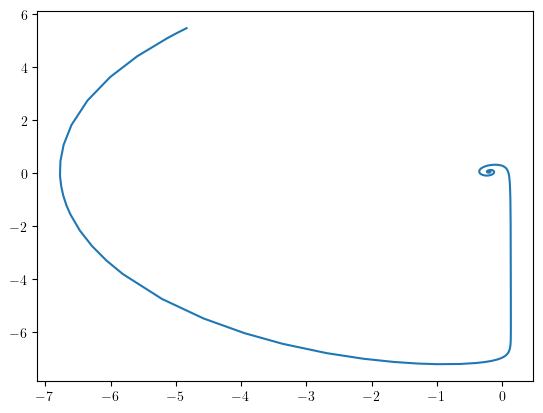

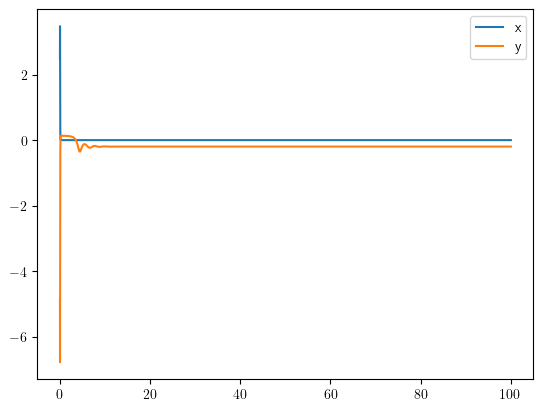

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.1701732958899212
[[  93.84204342]
 [-186.58008244]
 [-216.13251671]]


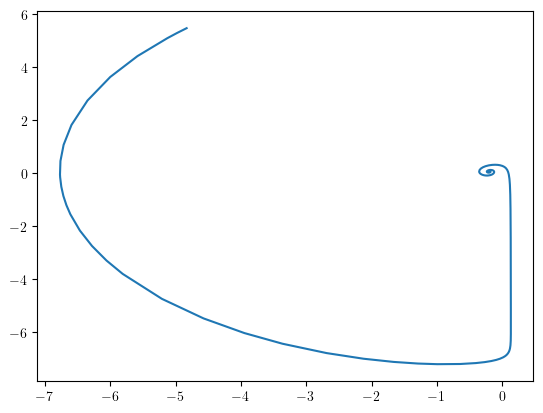

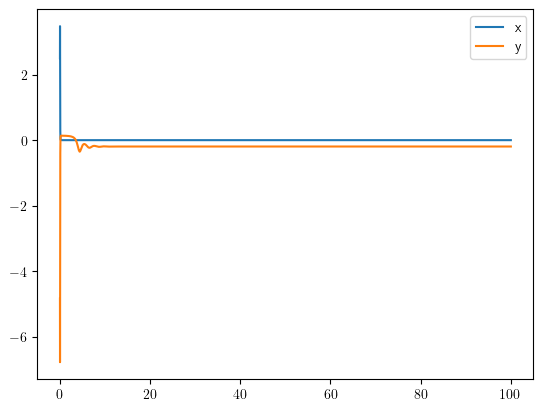

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.17324881762577682
[[  95.42485774]
 [-189.72210838]
 [-219.58231271]]


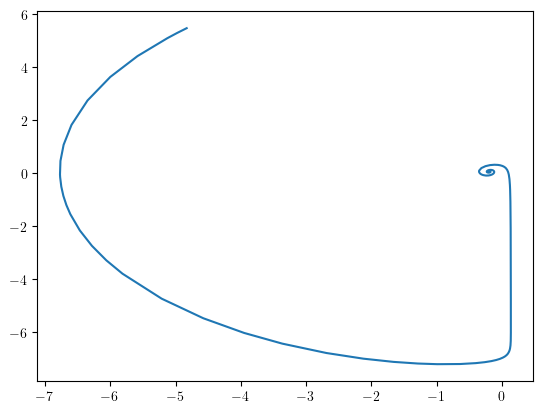

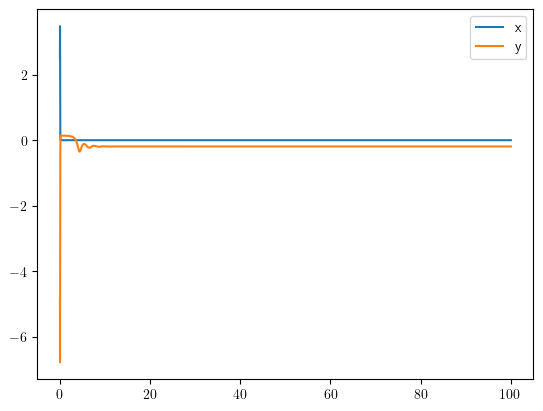

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.1762050114557394
[[  97.00719524]
 [-192.86386232]
 [-223.03347196]]


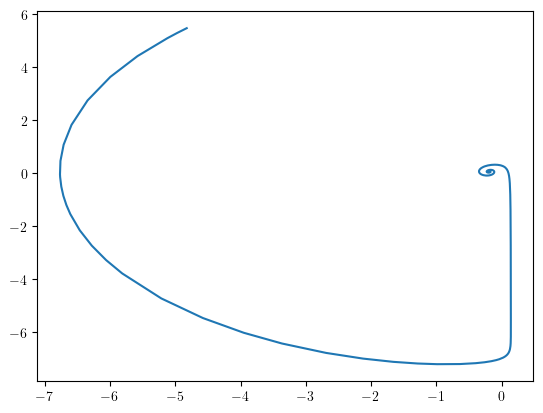

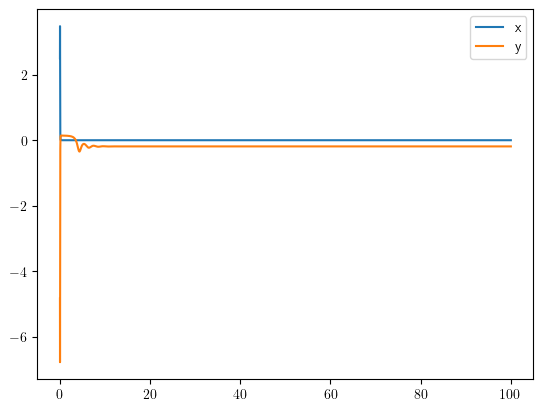

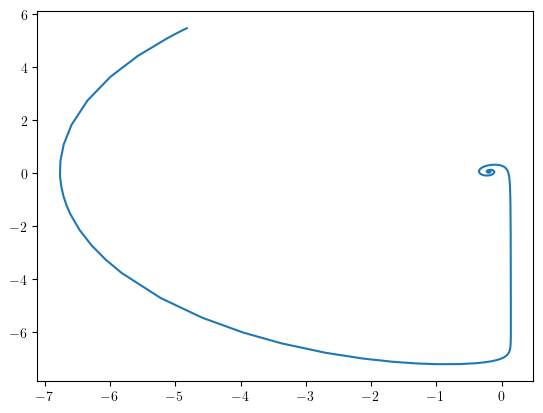

In [35]:
W_oszi = np.linspace(1,(K[0]-2.3)/3.53,10)
K_oszi = K0-W0*slope+slope*W_oszi
from sympy.abc import gamma, G, kappa, omega, x, y, z, t
from sympy.matrices import Matrix
from sympy import lambdify
import numpy as np
m = Matrix([x,y,z])
glx = -(gamma+G)/2*m[0]+kappa*m[0]*m[2]/np.sqrt(2)
gly = -omega*m[2]/np.sqrt(2)-(gamma+G)/2*m[1]+kappa*m[1]*m[2]/np.sqrt(2)
glz = omega*m[1]/np.sqrt(2)-kappa*(m[0]**2+m[1]**2)/np.sqrt(2)+G/2-G*m[2]
gl = Matrix([glx,gly,glz])
jac_gl = gl.jacobian([x,y,z])
gl_np = lambdify([t,m,omega,kappa,G,gamma],gl)
jac_gl_np = lambdify([t,m,omega,kappa,G,gamma],jac_gl)
gl_np(0,[0,2,1],1,1/2,0.2,1), jac_gl_np(0,[0,2,1],1,1/2,0.2,1)
from scipy.integrate import solve_ivp
k = kappa_np(-A[6],1,0.2,1)
# arguments = [k,k/kw[6,1],0.2,1]
def m_z(x,y,omega,kappa,G):
    return 1/2-(kappa*(x**2+y**2)-omega*y)/G/np.sqrt(2)
# msol = [0,root[6,6]/kw[6,1],m_z(0,root[6,6]/kw[6,1],1,k,k/kw[6,1])]
# gl_np(0,msol,k,k/kw[6,1],0.2,1)
# a=-0.05
# kw=0.3
# g = 0.2
# G=1
# k= kappa_np(a,G,g,1)
# w= k/kw

# def Func(y,A,kw,Gam,sgam,mp):
# a = G*(G+g-k/np.sqrt(2))
# print(kappa_np(a,G,g,1))
# index = 0
# arguments = [W_oszi[index],K_oszi[index],Gam,sgam]
# def F(y,omega,k,G,gamma):
#     return -omega*G/np.sqrt(2)/k**2-(G*(G+gamma-k/np.sqrt(2))/k**2+omega**2/k**2)*y-y**3+2*omega/k*y**2
# r = root_scalar(F,args=(W_oszi[index],K_oszi[index],Gam,sgam),method='brentq',bracket=(minF(W_oszi[index],K_oszi[index])*W_oszi[index]/K_oszi[index],maxF(W_oszi[index],K_oszi[index])*W_oszi[index]/K_oszi[index]))
# print(r)
# msol2= np.array([0,r.root,m_z(0,r.root,W_oszi[index],K_oszi[index],Gam)])+np.array([0,-1,1])
# print(gl_np(0,msol2,W_oszi[index],K_oszi[index],Gam,sgam))
# traj = solve_ivp(gl_np,(0,100),msol2,'LSODA',args=arguments)
# plt.figure()
# plt.plot(traj.t,traj.y[0])
# plt.plot(traj.t,traj.y[1])
# plt.plot(traj.t,traj.y[2])
# plt.legend(['x','y','z'])
# plt.show()
# plt.figure()
# plt.plot(traj.y[1],traj.y[2])
for index in range(len(W_oszi)):
    arguments = [W_oszi[index],K_oszi[index],Gam,sgam]
    def F(y,omega,k,G,gamma):
        return -omega*G/np.sqrt(2)/k**2-(G*(G+gamma-k/np.sqrt(2))/k**2+omega**2/k**2)*y-y**3+2*omega/k*y**2
    r = root_scalar(F,args=(W_oszi[index],K_oszi[index],Gam,sgam),method='brentq',bracket=(minF(W_oszi[index],K_oszi[index])*W_oszi[index]/K_oszi[index],maxF(W_oszi[index],K_oszi[index])*W_oszi[index]/K_oszi[index]))
    print(r)
    msol2= np.array([0,r.root,m_z(0,r.root,W_oszi[index],K_oszi[index],Gam)])+5*np.array([0.5,-1,1])
    print(gl_np(0,msol2,W_oszi[index],K_oszi[index],Gam,sgam))
    traj = solve_ivp(gl_np,(0,100),msol2,'LSODA',args=arguments)
    plt.figure()
    plt.plot(traj.t,traj.y[0])
    plt.plot(traj.t,traj.y[1])
    # plt.plot(traj.t,traj.y[2])
    plt.legend(['x','y','z'])
    plt.show()
    plt.figure()
    plt.plot(traj.y[1],traj.y[2]) 

-6.794123601355784e-07 8980500268.606827
-7.179442501059619e-07 12530995037.981106
-7.582211202228351e-07 15520866661.043312
-8.006873869342845e-07 17958512559.186394
-8.457746326490101e-07 19881004112.305584
-8.939343948966005e-07 21332885062.83916
-9.456622625247935e-07 22358821752.128784
-1.0015198121104962e-06 23001036572.701935
-1.0621579788622215e-06 23298551252.277847
-1.1283445675719372e-06 23287140456.339024
-1.2009986467831357e-06 22999556653.214584
-1.2812352173513508e-06 22465842873.047115
-1.3704248281870557e-06 21713655518.13104
-1.4702749641798407e-06 20768564533.575638
-1.582943557829064e-06 19654317428.30556
-1.7112008171144e-06 18393060742.215725
-1.8586654772223543e-06 17005513125.931822
-2.030158949964389e-06 15511079795.875393
0.10416666666666667


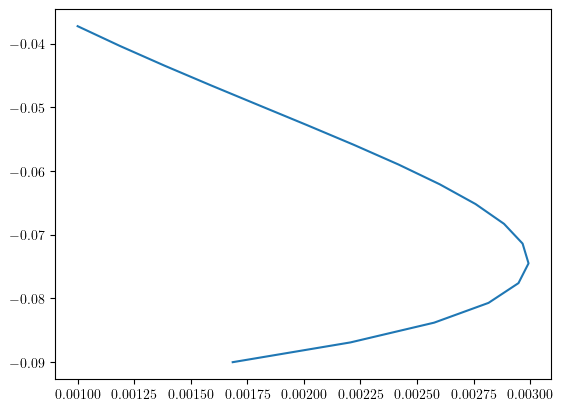

In [39]:
# plt.figure()
# A = np.stack((np.linspace(-1/8,0-1/1000,100),np.linspace(-1/8,0,100)),axis=1)
# k_test = np.zeros_like(A[:,0])
# G = np.linspace(0.2,1.3,5)
# l = G.shape[0]
# for j in range(l):
#     Gam = G[j]
#     sgam = 0.2*Gam
#     for i in range(A.shape[0]//2):
#         k_test[i]= kappa_np(A[i,0],Gam,sgam,-1)
#     plt.plot(A[:,0],np.sqrt(-k_test**2*A[:,0]/2))
   
# for Gam in G:
#     plt.hlines(Gam,A[0,0],A[-1,0])
# plt.legend(['1','2','3','4','5'])
# plt.show()
x = np.linspace(0,200)
Gam =0.7
sgam = 0.2*Gam
def w_inv(x,a,Gamma,gamma):
    k = kappa_np(a,Gamma,gamma,-1)
    s2= np.sqrt(2)
    return -2/27-(2*gamma+k/s2)/3*Gamma*x**2+2/27*(1-3*(2*Gamma**2/k**2+a)*x**2)**(3/2)
A = np.linspace(-0.09,0-1/10**5,30)[:18]
root = np.zeros_like(A)
for i in range(A.shape[0]):
    a= A[i]
    # print(kappa_np(a,Gam,sgam,-1))
    # print(2*Gam**2/kappa_np(a,Gam,sgam,-1)**2+a)
    print(w_inv(0.001,a,Gam,sgam),w_inv(20000,a,Gam,sgam))
    r = root_scalar(w_inv,args=(a,Gam,sgam),method='brentq',bracket=(0.001,20000))
    root[i] = r.root
print(1/8/(1+sgam/Gam))
plt.figure()
plt.plot(1/root,A)
# plt.plot(x,w_inv(x,A[0],))
plt.show()



